# Web Scraping for Indeed.com & Predicting Salaries

### Scraping job listings from Indeed.com

In [2]:
URL = "http://www.indeed.com/jobs?q=data+scientist&l=Boston%2C+MA"

In [91]:
import requests
import bs4
from bs4 import BeautifulSoup
import urllib
import urllib2
import pandas as pd
import time
import random


In [3]:
#defining my data extractor, this takes the page html from beautifulsoup as the input and returns a
#pandas df with the job name, location, salary and description columns

def data_extractor(crawler):
    idx = ["title", "co", "loc", "sal", "des"]
    tempdf = pd.DataFrame(columns = idx) #temp DF to return with all job data
    
    jobs = crawler.findAll(["a", "div"],{'data-tn-component':'organicJob'})
    for job in jobs:
        title= job.h2.a['title']
        company = job.span.span.text.strip()
        loc = job.findAll("span", {"itemprop": "addressLocality"})
        location = loc[0].text
        
        if job.nobr == None:
            salary = None 
        else:
            salary= job.nobr.text.strip()
        description= job.table.span.text.strip()

        newrow=pd.Series([title, company, location, salary, description], index = idx)
        tempdf = tempdf.append(newrow, ignore_index = 1)
        
    return tempdf

In [21]:
"""DATA SCRAPING CODE TAKES A LONG TIME TO RUN"""

base = "http://www.indeed.com"
idx = ["title", "co", "loc", "sal", "des"]
alljobs = pd.DataFrame(columns = idx) 

query_list =  ["machine learning", "data scientist", "data engineer"] 

city_list = ["cleveland","boston", "new+york", "san+francisco", 
        "austin", "dallas", "oregon",
       "baltimore", "philadelphia", "miami", "chicago",
       "denver", "los+angeles", "san+diego", "seattle", 
             "washington+DC", "hartford"]


for query in query_list:
    for city in city_list:

        URL = "http://www.indeed.com/jobs?q="+urllib2.quote(query)+"&l=" + urllib2.quote(city) #set up first page

        new_page = requests.get(URL)
        crawler = BeautifulSoup(new_page.content, "lxml") #structure the page with the parser


        alljobs = alljobs.append(data_extractor(crawler)) #extract first page using function
        

        #Now the while loop will search for the 'next' button and take the href from there and update link
        #and will call the data_extractor on it which will continuously append to alljobs DF
        
        #need to wrap the while loop in a "try" in case there is only one page and there is no "next"
        try:
            while crawler.findAll('span',{'class':'np'})[-1].text[:4] == 'Next':


                URL = crawler.findAll('span',{'class':'np'})[-1].findParent('a')['href']
                new_page = requests.get(base + URL)

                time.sleep(.25) # little nap between downloads so that I dont get GA ip adress banned

                crawler = BeautifulSoup(new_page.content, "lxml")

                ### this is the individual page parser here

                alljobs = alljobs.append(data_extractor(crawler))
            else: 
                print "finished with ", query , "in ", city #just a ticker to let me know it is cycling through
        
        except IndexError:
            alljobs = alljobs.append(data_extractor(crawler))
            print "finished with ", query , "in ", city #just a ticker to let me know it is cycling through
            

print "ALL DONE!!!"



finished with  machine learning in  cleveland
finished with  machine learning in  boston
finished with  machine learning in  new+york
finished with  machine learning in  san+francisco
finished with  machine learning in  austin
finished with  machine learning in  dallas
finished with  machine learning in  oregon
finished with  machine learning in  baltimore
finished with  machine learning in  philadelphia
finished with  machine learning in  miami
finished with  machine learning in  chicago
finished with  machine learning in  denver
finished with  machine learning in  los+angeles
finished with  machine learning in  san+diego
finished with  machine learning in  seattle
finished with  machine learning in  washington+DC
finished with  machine learning in  hartford
finished with  data scientist in  cleveland
finished with  data scientist in  boston
finished with  data scientist in  new+york
finished with  data scientist in  san+francisco
finished with  data scientist in  austin
finished with

In [3]:

import sys
reload(sys)
sys.setdefaultencoding('utf-8') 

#the internet told me i need this to be able to save down to csv because of some formatting issue in the data

alljobs.to_csv("data_pull_8.3") #save down the raw file so that I dont have to re-run the import code

NameError: name 'alljobs' is not defined

In [2]:
####START HERE FOR RERUNS####


import requests
import bs4
from bs4 import BeautifulSoup
import urllib
import urllib2
import pandas as pd
import time
import random


alljobs = pd.read_csv("assets/data_pull_8.3")
alljobs.drop("Unnamed: 0", axis =1, inplace=1)

alljobs.head(5)



,title,co,loc,sal,des
0,Data Scientist,Progressive,"Mayfield Village, OH",NaN,"Demonstrated skills in data mining, machine le..."
1,Data Analytics Developer,"Intwine Connect, LLC","Cleveland, OH 44106 (University District area)","$60,000 a year","Signal processing, regression techniques, opti..."
2,Data Scientist Senior,Progressive,"Mayfield Village, OH",NaN,"Demonstrated skills in data mining, machine le..."
3,Customer Insight Communication Manager,Swagelok,"Solon, OH",NaN,The vision for the program is to build a cente...
4,Data Scientist,Progressive,"Mayfield Village, OH",NaN,"Demonstrated skills in data mining, machine le..."


In [3]:
print len(alljobs)

alljobs.reset_index(drop=1, inplace=1) #28K records pulled, not bad

28177


In [4]:
(1 - alljobs.sal.isnull().sum()/float(len(alljobs)) )*100 

#percent of jobs that contain something in the salary

7.403201192461939

In [5]:
ajclean = alljobs.copy()

ajclean.dropna(inplace =1) #drop where salaries are not included

ajclean.head()

,title,co,loc,sal,des
1,Data Analytics Developer,"Intwine Connect, LLC","Cleveland, OH 44106 (University District area)","$60,000 a year","Signal processing, regression techniques, opti..."
5,Data Analytics Developer,"Intwine Connect, LLC","Cleveland, OH 44106 (University District area)","$60,000 a year","Signal processing, regression techniques, opti..."
25,Data Analytics Engineer,MaxMind,"Waltham, MA 02451","$100,000 a year",Data mining / machine learning experience. Upd...
33,"Data Scientist - healthcare, hacking coding sk...",The Bivium Group,"Cambridge, MA","$90,000 - $140,000 a year", Will use technologies from Machine Learning....
35,Software Developer,Apex Systems Inc,"Boston, MA","$130,000 - $140,000 a year","Experience with Machine Learning, MongoDB, NoS..."


In [6]:
ajclean.sal.head()

1                 $60,000 a year
5                 $60,000 a year
25               $100,000 a year
33     $90,000 - $140,000 a year
35    $130,000 - $140,000 a year
Name: sal, dtype: object

In [7]:
ajclean.sal[~ajclean.sal.isnull()] = [_.replace(",","").replace("$","") 
                                      for _ in ajclean.sal[~ajclean.sal.isnull()] ] 
#get the commas and $ out of there


In [8]:
import re

In [9]:
droprows = ajclean.sal[(ajclean.sal.str.contains("hour"))].index #index of rows with hourly ranges in them

ajclean.drop(droprows, inplace =1)

ajclean.head()

,title,co,loc,sal,des
1,Data Analytics Developer,"Intwine Connect, LLC","Cleveland, OH 44106 (University District area)",60000 a year,"Signal processing, regression techniques, opti..."
5,Data Analytics Developer,"Intwine Connect, LLC","Cleveland, OH 44106 (University District area)",60000 a year,"Signal processing, regression techniques, opti..."
25,Data Analytics Engineer,MaxMind,"Waltham, MA 02451",100000 a year,Data mining / machine learning experience. Upd...
33,"Data Scientist - healthcare, hacking coding sk...",The Bivium Group,"Cambridge, MA",90000 - 140000 a year, Will use technologies from Machine Learning....
35,Software Developer,Apex Systems Inc,"Boston, MA",130000 - 140000 a year,"Experience with Machine Learning, MongoDB, NoS..."


In [10]:
ajclean[(ajclean.sal.str.contains("hour"))] #quick check

,title,co,loc,sal,des


In [11]:
ajclean.sal[ajclean.sal.str.contains("-")].iloc[0].split()[0]

'90000'

In [12]:
mask = ajclean.sal.str.contains("-")

ajclean.sal[mask] = [float(_.split()[0])*.5 + float(_.split()[2])*.5 for _ in ajclean.sal[mask]]

#average out the range of salary columns and convert to float

ajclean.head(5)


,title,co,loc,sal,des
1,Data Analytics Developer,"Intwine Connect, LLC","Cleveland, OH 44106 (University District area)",60000 a year,"Signal processing, regression techniques, opti..."
5,Data Analytics Developer,"Intwine Connect, LLC","Cleveland, OH 44106 (University District area)",60000 a year,"Signal processing, regression techniques, opti..."
25,Data Analytics Engineer,MaxMind,"Waltham, MA 02451",100000 a year,Data mining / machine learning experience. Upd...
33,"Data Scientist - healthcare, hacking coding sk...",The Bivium Group,"Cambridge, MA",115000, Will use technologies from Machine Learning....
35,Software Developer,Apex Systems Inc,"Boston, MA",135000,"Experience with Machine Learning, MongoDB, NoS..."


In [13]:
ajclean.sal = [float(_.split()[0]) if type(_) == str else _ for _ in ajclean.sal] 
#clean out remaining "a years"...

In [14]:
ajclean.sal.dtype #Eureka! all salaries afloat

dtype('float64')

In [15]:
ajclean = ajclean[ajclean.sal>25000] #throw out any salaries under 25k since those are likely typos or NAs

In [16]:
ajclean.head()
ajclean.dtypes

## YOUR CODE HERE

title     object
co        object
loc       object
sal      float64
des       object
dtype: object

In [17]:
ajclean.columns= ["title", "co", "location", "sal", "des"]  #cant use loc with . notation since it is already a method



In [18]:
len(ajclean.location.unique()) #need clean up and convert to dummies if I can reduce this

322

In [19]:
ajclean["cities"] = [_.split(",")[0].replace(",","") for _ in ajclean.location]

states=[]
for location in ajclean.location:
    try:
        states.append(location.split(",")[1].split()[0].replace(",",""))
    except IndexError:
        states.append(location.split()[0].replace(",",""))

ajclean["states"] = states

#adding in states and cities as a datapoint    


ajclean.head()

,title,co,location,sal,des,cities,states
1,Data Analytics Developer,"Intwine Connect, LLC","Cleveland, OH 44106 (University District area)",60000.0,"Signal processing, regression techniques, opti...",Cleveland,OH
5,Data Analytics Developer,"Intwine Connect, LLC","Cleveland, OH 44106 (University District area)",60000.0,"Signal processing, regression techniques, opti...",Cleveland,OH
25,Data Analytics Engineer,MaxMind,"Waltham, MA 02451",100000.0,Data mining / machine learning experience. Upd...,Waltham,MA
33,"Data Scientist - healthcare, hacking coding sk...",The Bivium Group,"Cambridge, MA",115000.0, Will use technologies from Machine Learning....,Cambridge,MA
35,Software Developer,Apex Systems Inc,"Boston, MA",135000.0,"Experience with Machine Learning, MongoDB, NoS...",Boston,MA


In [20]:
ajclean.states.unique()

array(['OH', 'MA', 'NY', 'New', 'NJ', 'CA', 'TX', 'OR', 'MD', 'PA', 'DE',
       'FL', 'IL', 'CO', 'WA', 'DC', 'VA', 'CT', 'Oregon'], dtype=object)

In [21]:
ajclean.states[ajclean.states == "Oregon"] = "OR"

/Users/egorkharakozov/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [22]:
ajclean[ajclean.states=="New"]

,title,co,location,sal,des,cities,states
996,Director of Engineering,Analytics Media Group,New York State,160000.0,Practical experience with unsupervised machine...,New York State,New
6854,Senior Sensory Research Analyst,Smith Hanley Associates,New York State,70000.0,4.To brief and manage the SSC (sensory panel m...,New York State,New
15017,Director of Engineering,Analytics Media Group,New York State,160000.0,"Experience wrangling terabytes of big, complic...",New York State,New


In [23]:
mask = [type(x) == str for x in ajclean.sal]

ajclean[mask]

,title,co,location,sal,des,cities,states


In [24]:
ajclean.cities[ajclean.cities=="New York State"] ="New York" 
ajclean.states[ajclean.states=="New"] ="NY" 

ajclean.dtypes
#just clean up this last few new york ones

/Users/egorkharakozov/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/egorkharakozov/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


title        object
co           object
location     object
sal         float64
des          object
cities       object
states       object
dtype: object

In [25]:
print len(ajclean.cities.unique())
print len(ajclean.states.unique())

208
17


In [26]:
descriptions = [_.lower().replace(",","").replace(".","").replace("...","").replace("!","").replace("/", " ")
                for _ in ajclean.des]

wordcount = {}

for description in descriptions:
    for word in description.split():
        if word in wordcount.keys():
            wordcount[word] +=1
        else:
            wordcount[word] =1


In [27]:
wc= pd.DataFrame({"word": wordcount.keys(), "count": wordcount.values()})



In [28]:
wc.word = [_.strip().lower() for _ in wc.word]

In [29]:
top_words= wc[wc.word.apply(len)>=3].sort_values(by="count", ascending = 0)

exclude = ["and", "the", "with", "for", "will", "are", "team", "looking", "you", "work", "our", "this",
           "that", "their", "from", "other", "science", "using", "have", "tools", "center"]


top_words[~top_words.word.isin(exclude)]


#the above looks at the top words occurences in the descriptions. From that I can create a list to 
#get dummy variables for these words into my data set



,count,word
1248,1670,data
217,510,machine
1674,496,learning
355,478,engineer
2176,336,experience
4028,212,software
579,212,analytics
722,210,big
2753,193,engineers
1533,147,senior


In [30]:
keywords=["machine learning", "engineer", "analytics", "big data", "senior", "analysis", "python", 
          "health", "modeling", "development", "research", "design", "management", "sql", " r ", "predictive",
         "sas", "excel", "hadoop", "spark", "regression", "lead", "manager"]

# I will create a 0/1 dummy for each of these depending on presence in description, but I want to create
# a few other columns first

In [31]:
median = ajclean.sal.median()

ajclean["target"] = [ "high" if _ > median else "low" for _ in ajclean.sal]

ajclean.target.head()

1      low
5      low
25     low
33    high
35    high
Name: target, dtype: object

In [32]:
ajclean["var_desc_len"] = [len(_) for _ in ajclean.des] #probably not a very telling variable but we shall see

ajclean.var_desc_len.head(3)
#len(ajclean.des.iloc[0])

1     128
5     128
25    134
Name: var_desc_len, dtype: int64

In [33]:
import numpy as np
import pandas as pd
import patsy
import statsmodels as sm

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.grid_search import GridSearchCV


In [34]:
""" redo with SM"""


# I will split to test train after I get all of my variables set up, for now just fit to whole dataset

#I will use the state since there are less variables there. First I need dummies:

statedums= pd.get_dummies(ajclean.states, prefix = "st_var_")

statedums.head(3)
#CA will be my base case so i will drop it when conatinating to my dataframe

,st_var__CA,st_var__CO,st_var__CT,st_var__DC,st_var__DE,st_var__FL,st_var__IL,st_var__MA,st_var__MD,st_var__NJ,st_var__NY,st_var__OH,st_var__OR,st_var__PA,st_var__TX,st_var__VA,st_var__WA
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
ajclean = pd.concat([ajclean,statedums], axis =1)
ajclean.head(3)

,title,co,location,sal,des,cities,states,target,var_desc_len,st_var__CA,...,st_var__MA,st_var__MD,st_var__NJ,st_var__NY,st_var__OH,st_var__OR,st_var__PA,st_var__TX,st_var__VA,st_var__WA
1,Data Analytics Developer,"Intwine Connect, LLC","Cleveland, OH 44106 (University District area)",60000.0,"Signal processing, regression techniques, opti...",Cleveland,OH,low,128,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,Data Analytics Developer,"Intwine Connect, LLC","Cleveland, OH 44106 (University District area)",60000.0,"Signal processing, regression techniques, opti...",Cleveland,OH,low,128,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
25,Data Analytics Engineer,MaxMind,"Waltham, MA 02451",100000.0,Data mining / machine learning experience. Upd...,Waltham,MA,low,134,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
ajclean.drop("st_var__CA", axis =1, inplace =1) #CA is base case

In [37]:
"""REDO IN STATSMODELS"""
import statsmodels.api as sma

mask3 = ajclean.columns[ajclean.columns.str.contains("st_")]

aj_int = ajclean.copy()
aj_int = aj_int[mask3]
aj_int["intercept"] = 1.0  #splitting out to a separate df and adding a column of 1s to feed statsmodels
X = aj_int
y = [1 if _ =="high" else 0 for _ in ajclean.target]


logreg = sma.Logit(y,X)

lrfit = logreg.fit()

lrfit.summary()

Optimization terminated successfully.
         Current function value: 0.627567
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1627
Model:                          Logit   Df Residuals:                     1610
Method:                           MLE   Df Model:                           16
Date:                Mon, 08 Aug 2016   Pseudo R-squ.:                 0.09446
Time:                        11:56:22   Log-Likelihood:                -1021.1
converged:                       True   LL-Null:                       -1127.6
                                        LLR p-value:                 1.832e-36
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
st_var__CO    -1.9172      0.338     -5.678      0.000        -2.579    -1.255
st_var__CT    -1.8918      0.521     -3.629      0.000        -2.914    -0.870
st_var__DC    -0.4286      0.262     -1.636      0.102        -0.942     0.085
st_var__DE    -0.2054      0.922     -0.223      0.824        -2.012     1.601
st_var__FL    -2.3745      0.460     -5.163      0.000        -3.276    -1.473
st_var__IL    -0.4583      0.191     -2.394      0.017        -0.834    -0.083
st_var__MA    -0.2200      0.201     -1.093      0.274        -0.615     0.175
st_var__MD    -1.4895      0.262     -5.684      0.000        -2.003    -0.976
st_var__NJ    -1.9972      1.125     -1.775      0.076        -4.203     0.208
st_var__NY    -0.2148      0.179     -1.203      0.229        -0.565     0.135
st_var__OH    -2.5568      0.550     -4.653      0.000        -3.634    -1.480
st_var__OR    -2.4262      0.427     -5.682      0.000        -3.263    -1.589
st_var__PA    -1.1800      0.262     -4.510      0.000        -1.693    -0.667
st_var__TX    -1.4390      0.219     -6.556      0.000        -1.869    -1.009
st_var__VA     0.5312      0.323      1.646      0.100        -0.101     1.164
st_var__WA     0.0483      0.343      0.141      0.888        -0.623     0.720
intercept      0.6109      0.127      4.794      0.000         0.361     0.861
==============================================================================
"""

In [38]:
import math

beta = .6109
math.exp(beta) / (1+math.exp(beta))

0.6481460769022964

The logistic regression is a linear regression against the logit function of the odds ratio of the target variable
being one of its two possible values.

If the coefficients are numbered b0, b1, b2, b3...etc and probability that target = 1 is p then the regression
takes the form of:

log(p/(p-1)) = b0 + b1x1 + b2x2...bnxn
this translates to p = exp(b0+...+bnxn) / (1+exp(b0+...+bnxn))

Since we are using the state dummy variables as the predictors in this example, the coefficients are the 
expected change in the log of the odds ratio if others coefficients are held constant.

Since the base case is CA, and in the above b0 = .6109, we would expect the log of the odds ratio that the salary
is high to be .6109 if the job posting is in CA.

To translate into probability we can take

p = e^(.6109)/(1+e(.6109))

Which calculates to mean that if the job is posted in California, there is an 65% chance that it is 
in the high category. Surfs up!


more detailed explanation below:

<http://www.ats.ucla.edu/stat/mult_pkg/faq/general/odds_ratio.htm>


In [39]:
predictions = pd.Series(list(lrfit.predict()))

ypred = [1 if (x > .5) else 0 for x in predictions]

sum(ypred)

1092

In [40]:
"""accuracy is not bad just training on location, 
obviosly when i fit the whole model i will use a train test split and crossvalidate etc..."""

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



cm = confusion_matrix(y, ypred)
cm = pd.DataFrame(cm)

print cm, "\n\n"

print classification_report(y, ypred)

     0    1
0  397  429
1  138  663 


             precision    recall  f1-score   support

          0       0.74      0.48      0.58       826
          1       0.61      0.83      0.70       801

avg / total       0.68      0.65      0.64      1627



In [41]:
#I am going to combine and search in both the job title and the job description to see if there are any key terms
#there that have explanatory power over the salary level

ajclean["text"] = [x + " " + y for x,y in zip(ajclean.title, ajclean.des)]

ajclean.text.head()

1     Data Analytics Developer Signal processing, re...
5     Data Analytics Developer Signal processing, re...
25    Data Analytics Engineer Data mining / machine ...
33    Data Scientist - healthcare, hacking coding sk...
35    Software Developer Experience with Machine Lea...
Name: text, dtype: object

In [42]:
print keywords #put this together in my wordcount exercise earlier

['machine learning', 'engineer', 'analytics', 'big data', 'senior', 'analysis', 'python', 'health', 'modeling', 'development', 'research', 'design', 'management', 'sql', ' r ', 'predictive', 'sas', 'excel', 'hadoop', 'spark', 'regression', 'lead', 'manager']


In [43]:
#flag if any keyword exists in either the title or the description to use as extra features

for word in keywords:
    ajclean["wd_var_"+word] = [1 if word in x.lower() else 0 for x in ajclean.text]
    
ajclean.head(3)

,title,co,location,sal,des,cities,states,target,var_desc_len,st_var__CO,...,wd_var_sql,wd_var_ r,wd_var_predictive,wd_var_sas,wd_var_excel,wd_var_hadoop,wd_var_spark,wd_var_regression,wd_var_lead,wd_var_manager
1,Data Analytics Developer,"Intwine Connect, LLC","Cleveland, OH 44106 (University District area)",60000.0,"Signal processing, regression techniques, opti...",Cleveland,OH,low,128,0.0,...,0,0,0,0,0,0,0,1,0,0
5,Data Analytics Developer,"Intwine Connect, LLC","Cleveland, OH 44106 (University District area)",60000.0,"Signal processing, regression techniques, opti...",Cleveland,OH,low,128,0.0,...,0,0,0,0,0,0,0,1,0,0
25,Data Analytics Engineer,MaxMind,"Waltham, MA 02451",100000.0,Data mining / machine learning experience. Upd...,Waltham,MA,low,134,0.0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
#something I forgot to do is standardize the desc_len
from sklearn import preprocessing


ajclean.var_desc_len = preprocessing.scale(ajclean.var_desc_len)


ajclean.var_desc_len.head(3)


/Users/egorkharakozov/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


1    -1.451276
5    -1.451276
25   -1.069951
Name: var_desc_len, dtype: float64

In [45]:

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.grid_search import GridSearchCV

In [46]:
cols = ajclean.columns[ajclean.columns.str.contains("var_")] #columns that hold variables
data = ajclean[cols]

corrmat = data.corr()

corrmat.iloc[:,1].index

Index([u'var_desc_len', u'st_var__CO', u'st_var__CT', u'st_var__DC',
       u'st_var__DE', u'st_var__FL', u'st_var__IL', u'st_var__MA',
       u'st_var__MD', u'st_var__NJ', u'st_var__NY', u'st_var__OH',
       u'st_var__OR', u'st_var__PA', u'st_var__TX', u'st_var__VA',
       u'st_var__WA', u'wd_var_machine learning', u'wd_var_engineer',
       u'wd_var_analytics', u'wd_var_big data', u'wd_var_senior',
       u'wd_var_analysis', u'wd_var_python', u'wd_var_health',
       u'wd_var_modeling', u'wd_var_development', u'wd_var_research',
       u'wd_var_design', u'wd_var_management', u'wd_var_sql', u'wd_var_ r ',
       u'wd_var_predictive', u'wd_var_sas', u'wd_var_excel', u'wd_var_hadoop',
       u'wd_var_spark', u'wd_var_regression', u'wd_var_lead',
       u'wd_var_manager'],
      dtype='object')

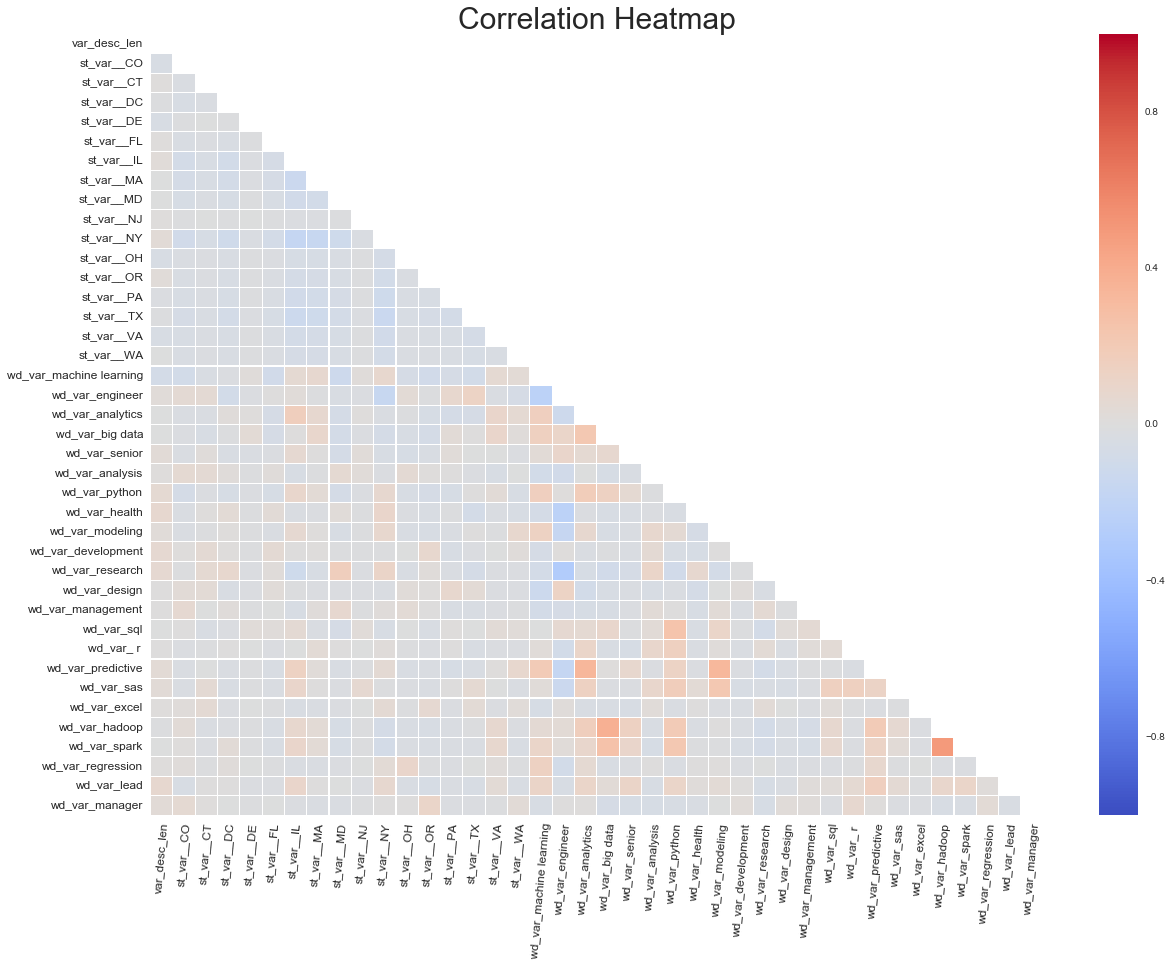

In [85]:
#lets check the correlation matrix with a graph
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

mask = np.tri(len(corrmat)).T

fig = plt.figure(figsize = (20,14))
axes = fig.gca()

axes.tick_params(labelsize = 12)


sns.set_style("white")

sns.heatmap(corrmat, cmap = "coolwarm", linecolor= "white", linewidths=".1", mask = mask);

plt.xticks(rotation = 85);

axes.set_title("Correlation Heatmap", size = 30)


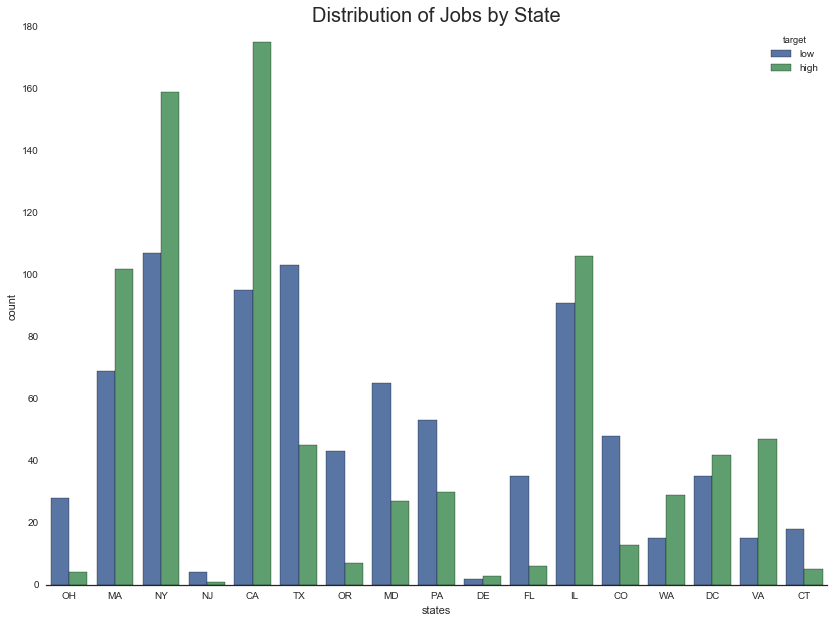

In [48]:
fig, ax = plt.subplots(figsize=(14,10))


a = sns.countplot(ajclean.states, hue = ajclean.target)

sns.despine(left=True)

ax.get_yaxis().set_visible(1)

a.set_title("Distribution of Jobs by State", size = 20)


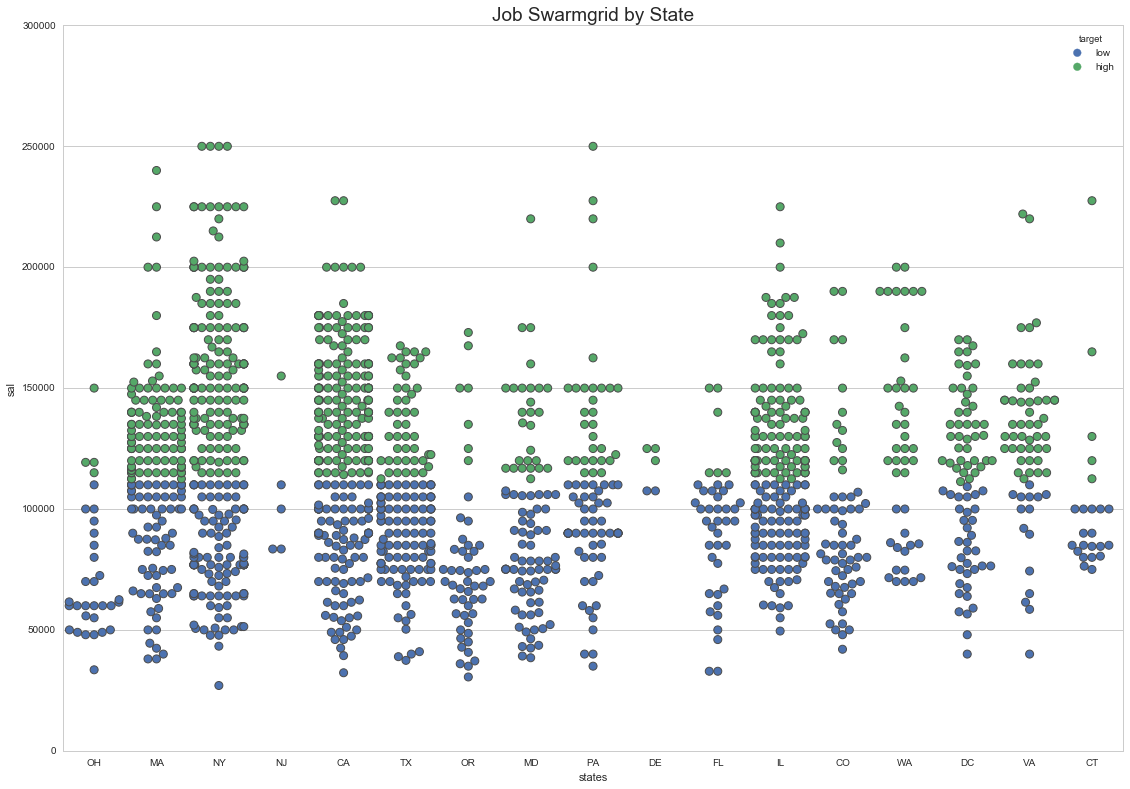

In [49]:

sns.set_style("whitegrid");

fig, ax = plt.subplots(figsize=(19,13));

sns.swarmplot(x = ajclean.states, y = ajclean.sal, hue = ajclean.target, size = 8, linewidth = 1);

ax.set_title("Job Swarmgrid by State", size = 19)

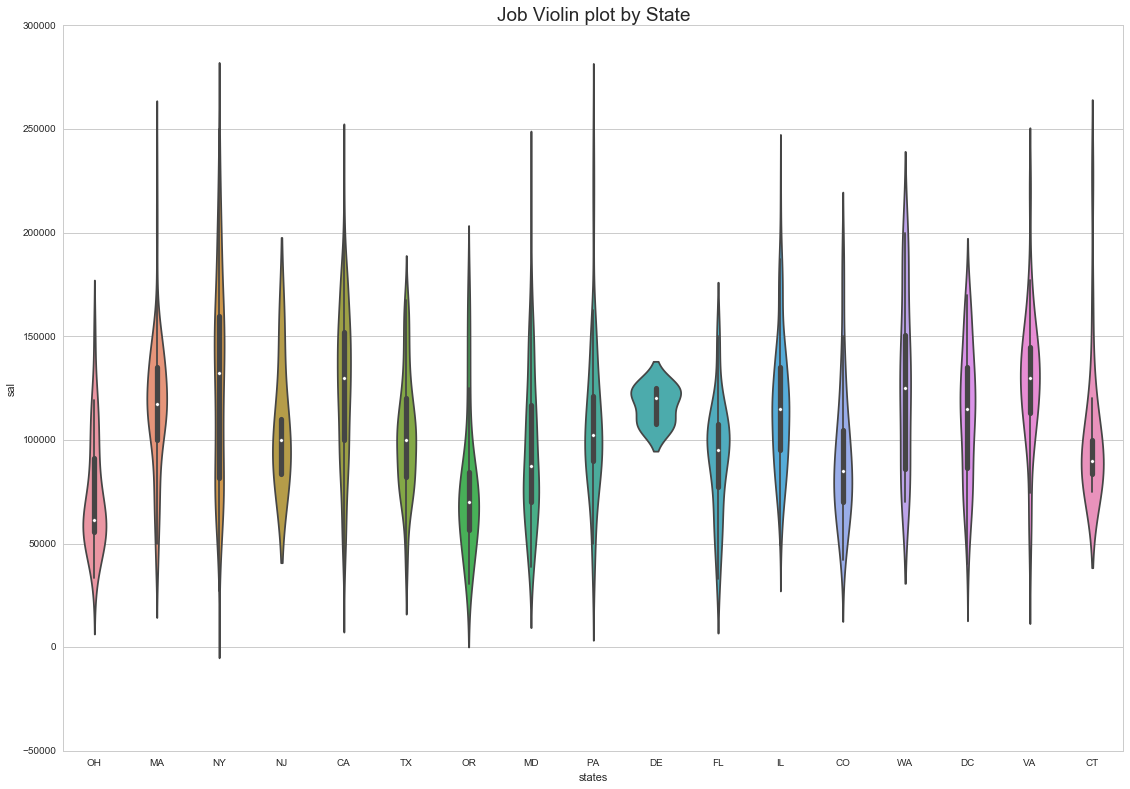

In [81]:

sns.set_style("whitegrid");

fig, ax = plt.subplots(figsize=(19,13));

sns.violinplot(x = ajclean.states, y = ajclean.sal);

ax.set_title("Job Violin plot by State", size = 19)


In [51]:
#make sure I have everything imported and define the plotting functions we used earlier this week

import numpy as np
import pandas as pd

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.grid_search import GridSearchCV

from sklearn.metrics import roc_curve, auc

def auc_plotting_function(rate1, rate2, rate1_name, rate2_name, curve_name):
    AUC = auc(rate1, rate2)
    # Plot of a ROC curve for class 1 (high_paying)
    plt.figure(figsize=[11,9])
    plt.plot(rate1, rate2, label=curve_name + ' (area = %0.2f)' % AUC, linewidth=4)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel(rate1_name, fontsize=18)
    plt.ylabel(rate2_name, fontsize=18)
    plt.title(curve_name + ' for salary over median', fontsize=18)
    plt.legend(loc="lower right")
    plt.show()

# plot receiving operator characteristic curve
def plot_roc(y_true, y_score):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    auc_plotting_function(fpr, tpr, 'False Positive Rate', 'True Positive Rate', 'ROC')

In [52]:
#our features are developed so first I split up the data:

mask4 = ajclean.columns[ajclean.columns.str.contains("_var_")]

X_train, X_test, y_train, y_test = train_test_split(ajclean[mask4], ajclean.target, 
                                                    test_size = .25, random_state = 1984)



In [53]:
logreg_cv_l1 = LogisticRegressionCV(Cs= 200, penalty = "l1", solver = "liblinear" , cv = 5)


cv_model_l1 = logreg_cv_l1.fit(X_train, y_train)

print "Best c for L1 is: ", logreg_cv_l1.C_[0]

Best c for L1 is:  1.38262217376


In [54]:

print(classification_report(y_test, logreg_cv_l1.predict(X_test)))

             precision    recall  f1-score   support

       high       0.71      0.67      0.69       208
        low       0.68      0.72      0.70       199

avg / total       0.70      0.70      0.70       407



""" Not too shabby, the regularization definitely seems to have helped as we are up to 73% f1 score
when predicting the test data which is even higher than our fit to the whole set when using 
statsmodels with the default regularization severity.

As far as precision and recall, I am not sure which is better for this model, there would be a trade off between 
the two.

Precision is accuracy of positive predictions = TP / (TP+FP)

Recall is fraction of positives identified = TP / (TP + FN)

Because there are only two buckets, there is a tradeoff between precision and recall between the two buckets.

Using the above report as an example, we see that out of every posting identified as "high", 71% are correct, 
however, only 67% of all "high" salaries are correctly identified. The "low" bucket has the opposite measures
of 68% precision but a relatively higher 72% recall. This means that the model "wants" to predict something into
the "low" bucket. Which captures a larger share of all true "low" salary postings (high recall on "low") but also
predicts more "high" salary postings as being "low" (lower precision on "low"). This is actually the desired 
effect that the manager is asking for since we would prefer to incorreclty tell a customer that they will receive
a low salary rather than high. We can further this "tilt" of the model later in this notebook by adjusting  the 
threshold for predicting the "high" bucket.

As seen below, the AUC is at .77 and this means that overall the model is a good predictor. If pairs two salaries are randomly 
sampled out of the true high and true low buckets, our model will classify corretly 77% of the time.

The ROC curve contemplates movement along the percentage threshold of predicting one of the categories so an AUC
and F1 (or precision or recal) measure are not relatable because there are many F1 scores for the model at different
points along the ROC.

"""


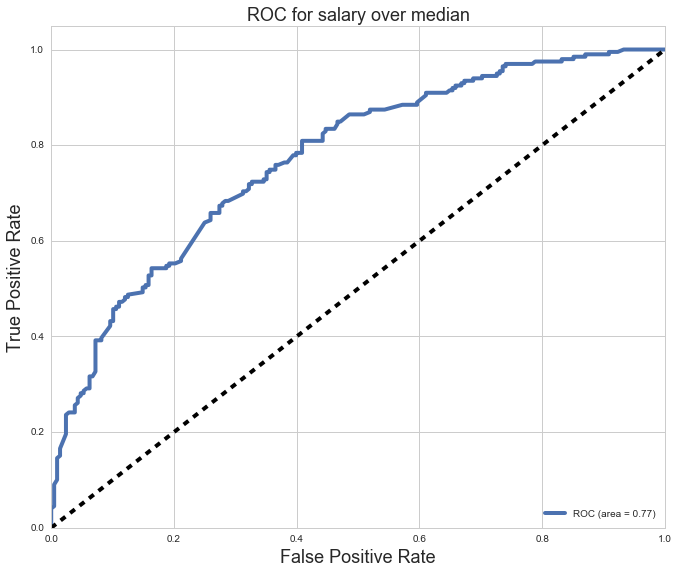

In [55]:
yscore = logreg_cv_l1.decision_function(X_test)

y_test_bin = [0 if _ == "high" else 1 for _ in y_test] #convert test set to binary

plot_roc(y_test_bin, yscore)

In [56]:
###now redoing the above steps to tune and test and l2 regularized model. 

In [57]:
logreg_cv_l2 = LogisticRegressionCV(Cs= 200, penalty = "l2", solver = "liblinear" , cv = 5)


cv_model_l2 = logreg_cv_l2.fit(X_train, y_train)

print "Best c for L2 is: ", logreg_cv_l2.C_[0]

Best c for L2 is:  0.10353218433


In [58]:
print(classification_report(y_test, logreg_cv_l2.predict(X_test)))

             precision    recall  f1-score   support

       high       0.74      0.66      0.70       208
        low       0.68      0.75      0.72       199

avg / total       0.71      0.71      0.71       407



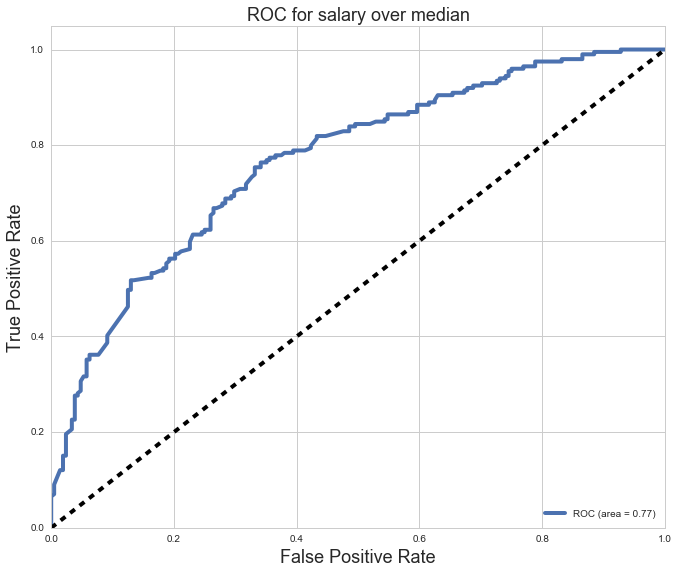

In [59]:
yscore = logreg_cv_l2.decision_function(X_test)

y_test_bin = [0 if _ == "high" else 1 for _ in y_test] #convert test set to binary

plot_roc(y_test_bin, yscore)

In [60]:
"""Interesting here as both models have the same AUROC, I suppose this is expected as I am already
using cross validation to arrive at the optimal regularization parameters and I am judging them on the 
fit of predicted versus test values but I will test further with the gridsearch  function to see if we can 
decide a winner.

"""

'Interesting here as both models have the same AUROC, I suppose this is expected as I am already\nusing cross validation to arrive at the optimal regularization parameters and I am judging them on the \nfit of predicted versus test values but I will test further with the gridsearch  function to see if we can \ndecide a winner.\n\n'

In [61]:
#lets confirm the above results with a gridsearch

logreg = LogisticRegression(solver = "liblinear")

C_vals = np.arange(.0001, 10, .05)

penalties =["l1", "l2"]

In [62]:
from sklearn.grid_search import GridSearchCV



gs = GridSearchCV(logreg, {"C" : C_vals, "penalty": penalties}, cv = 5)

gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([  1.00000e-04,   5.01000e-02, ...,   9.90010e+00,   9.95010e+00])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [63]:
gs.best_params_

#looks like L1 comes out slightly ahead despite having the lower f1 score. Given that f1 scores were so close 
#for both, we can chalk this up to rounding of the parameters and can happily use l1 as our model.

{'C': 1.4001000000000001, 'penalty': 'l1'}

In [64]:
#lastly, to satisfy the manager, we can shift our model to reduce the likelyhood that we incorrectly predict
# a high salary by shifting the probability threshold. 


logreg_final= LogisticRegression(penalty = "l1", solver = "liblinear", C = 1.4001)


final_model = logreg_final.fit(X_train, y_train)




In [65]:
y_prob = logreg_final.predict_proba(X_test)

y_pred_shifted60 = ["high" if x[0] >.6 else "low" for x in y_prob]
y_pred_shifted75 = ["high" if x[0] >.75 else "low" for x in y_prob]

In [66]:
print(classification_report(y_test, y_pred_shifted60))

             precision    recall  f1-score   support

       high       0.77      0.56      0.65       208
        low       0.64      0.82      0.72       199

avg / total       0.71      0.69      0.68       407



In [67]:
cm = confusion_matrix(y_test, y_pred_shifted60, labels = logreg_final.classes_)

cm = pd.DataFrame(cm, columns = logreg_final.classes_, index = logreg_final.classes_)
print cm

      high  low
high   116   92
low     35  164


In [68]:
"""Shifting to 60% threshold lowers the predictive power of the model somewhat but it does reduce
the chances of predicting a low salary. Only 35/407 which is about 9% of total cases that had this outcome
in the test data. Another way to note it is that we are aiming for 100% recall on the "low" bucket and 
we are at 82% here so about 1 our of every 5 "low" jobs may get classified as a "high". Only a slight
imporvement over the initial "optimal" model."""

'Shifting to 60% threshold lowers the predictive power of the model somewhat but it does reduce\nthe chances of predicting a low salary. Only 35/407 which is about 9% of total cases that had this outcome\nin the test data. Another way to note it is that we are aiming for 100% recall on the "low" bucket and \nwe are at 82% here so about 1 our of every 5 "low" jobs may get classified as a "high". Only a slight\nimporvement over the initial "optimal" model.'

In [69]:
print(classification_report(y_test, y_pred_shifted75))

             precision    recall  f1-score   support

       high       0.84      0.27      0.41       208
        low       0.55      0.94      0.70       199

avg / total       0.70      0.60      0.55       407



In [70]:
cm = confusion_matrix(y_test, y_pred_shifted75, labels = logreg_final.classes_)

cm = pd.DataFrame(cm, columns = logreg_final.classes_, index = logreg_final.classes_)
print cm

      high  low
high    57  151
low     11  188


In [71]:
"""Shifting to 75% threshold lowers the predictive power of the model substantially but it does reduce
the chances of predicting a low salary significantly. Only 11/407 which is about 3% of total cases that
had this outcome in the test data. Another way to note it is that we are aiming for 100% recall on the 
"low" bucket and we are at 94% here so very close but our model overall is heavily shifted to predicting
"low" so there are a lot of jobs that are actually "high" that get classified as "low" in our model."""

'Shifting to 75% threshold lowers the predictive power of the model substantially but it does reduce\nthe chances of predicting a low salary significantly. Only 11/407 which is about 3% of total cases that\nhad this outcome in the test data. Another way to note it is that we are aiming for 100% recall on the \n"low" bucket and we are at 94% here so very close but our model overall is heavily shifted to predicting\n"low" so there are a lot of jobs that are actually "high" that get classified as "low" in our model.'

In [72]:
35.0/407

0.085995085995086